In [1]:
!pip install librosa

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
file = "C:/Users/Dell/Downloads/UrbanSound8K/UrbanSound8K/audio/fold8/95549-3-0-6.wav"

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

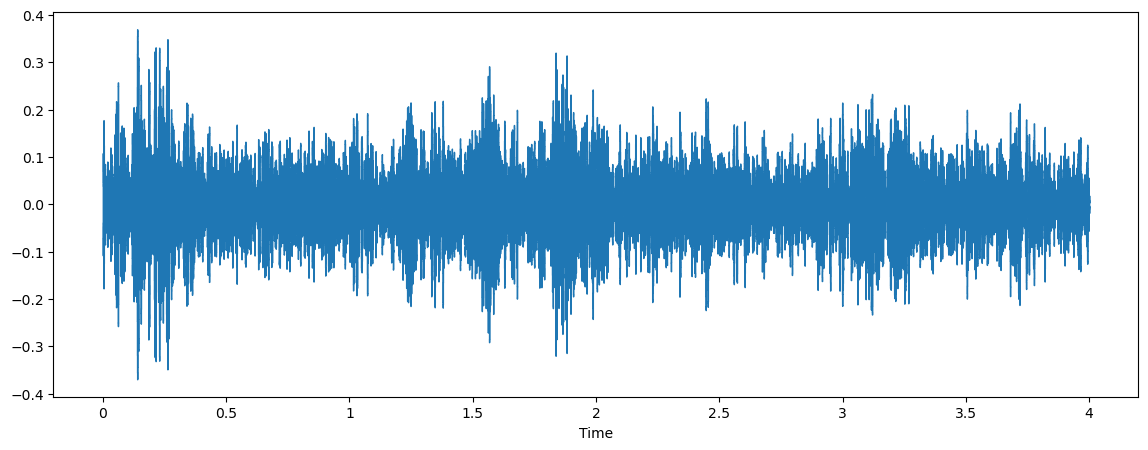

In [5]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(file)
librosa.display.waveshow(data,sr = sample_rate)
ipd.Audio(file)

In [6]:
file = "C:/Users/Dell/Downloads/UrbanSound8K/UrbanSound8K/audio/fold8/95549-3-0-6.wav"

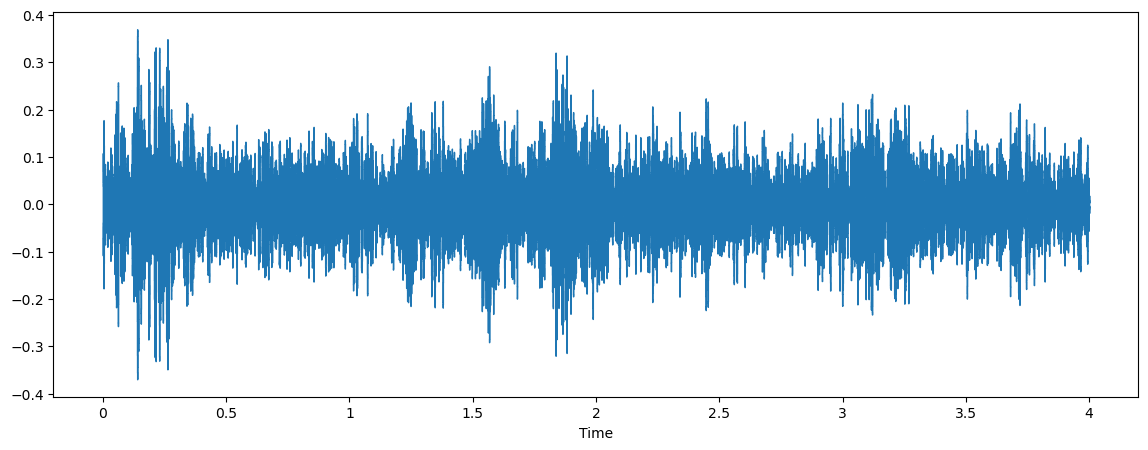

In [7]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(file)
librosa.display.waveshow(data, sr = sample_rate)
ipd.Audio(file)

In [8]:
sample_rate

22050

In [9]:
from scipy.io import wavfile as wav
wave_sample_rate , wave_audio = wav.read(file)

In [10]:
wave_sample_rate

44100

In [11]:
wave_audio

array([[ 1899,  4921],
       [ 1810,  4842],
       [ 1710,  4919],
       ...,
       [ -961,  -197],
       [-1000,   -67],
       [ -995,  -146]], dtype=int16)

In [12]:
import pandas as pd
metadata = pd.read_csv("C:/Users/Dell/Downloads/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv")

In [13]:
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [14]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

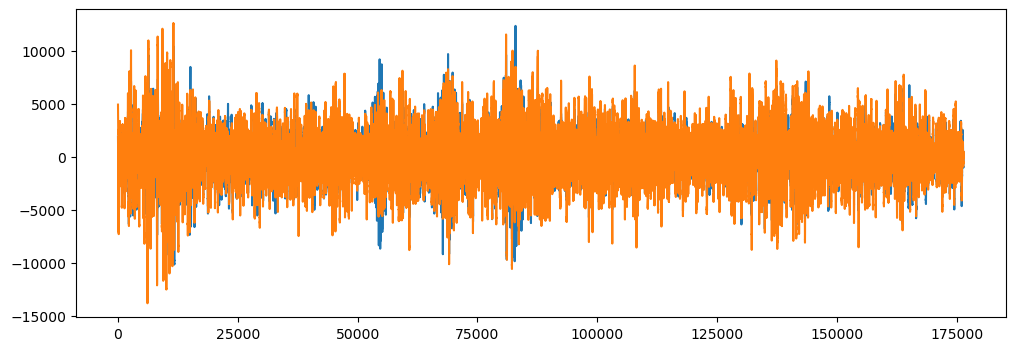

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [16]:
import librosa
audio_file_path = "C:/Users/Dell/Downloads/UrbanSound8K/UrbanSound8K/audio/fold8/95549-3-0-6.wav"
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [17]:
librosa_audio_data

array([ 0.07654885,  0.1080405 ,  0.0928885 , ..., -0.0128112 ,
       -0.01409579, -0.01809398], dtype=float32)

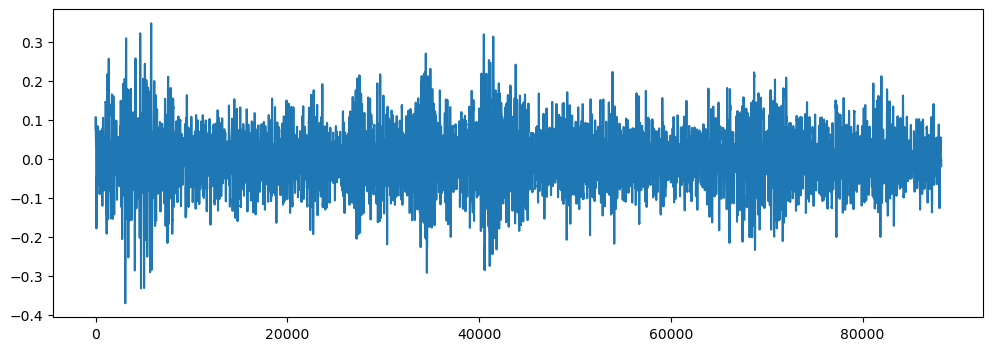

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [19]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)


In [20]:
mfccs

array([[-254.3208   , -285.69318  , -323.7528   , ..., -335.92798  ,
        -338.65952  , -351.06885  ],
       [ 134.35687  ,  149.1795   ,  166.92395  , ...,  157.07874  ,
         148.06346  ,  135.58905  ],
       [  27.589706 ,   46.162354 ,   79.8472   , ...,   69.0235   ,
          63.55007  ,   53.804848 ],
       ...,
       [  -1.8778602,   -1.1417809,   -3.3670273, ...,   -1.3866752,
          -5.4605393,   -4.5677795],
       [  -4.46539  ,   -3.2090364,   -4.8854094, ...,   -7.407584 ,
          -9.047526 ,   -9.107227 ],
       [   2.399723 ,    4.730359 ,    3.2219157, ...,   -0.4728881,
          -3.3757372,   -4.072139 ]], dtype=float32)

In [21]:
import pandas as pd
import os
audio_dataset_path = 'C:/Users/Dell/Downloads/UrbanSound8K/UrbanSound8K/audio'
metadata = pd.read_csv("C:/Users/Dell/Downloads/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv")

In [22]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [23]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3553it [02:39, 23.15it/s]C:\Users\Dell\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8323it [05:59, 31.14it/s]C:\Users\Dell\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [05:59, 35.40it/s]C:\Users\Dell\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [06:16, 23.22it/s]


In [24]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing
...,...,...
8727,"[-398.5845, 135.53496, -50.725018, 35.855907, ...",car_horn
8728,"[-346.4742, 86.34815, -45.16858, 51.709873, -3...",car_horn
8729,"[-303.88824, 111.35945, -45.941566, 35.877018,...",car_horn
8730,"[-344.11008, 125.45021, -54.90344, 34.891148, ...",car_horn


In [25]:
x = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [26]:
x

array([[-2.1735526e+02,  7.0223389e+01, -1.3038527e+02, ...,
        -1.6930532e+00, -6.1698353e-01,  3.8600513e-01],
       [-4.2409818e+02,  1.0934077e+02, -5.2919525e+01, ...,
         5.3489304e-01, -5.4468715e-01,  4.4632089e-01],
       [-4.5879114e+02,  1.2138419e+02, -4.6520657e+01, ...,
         2.0768483e+00,  1.6962965e+00, -9.6140975e-01],
       ...,
       [-3.0388824e+02,  1.1135945e+02, -4.5941566e+01, ...,
        -3.0292377e+00,  2.7170293e+00,  7.6197419e+00],
       [-3.4411008e+02,  1.2545021e+02, -5.4903439e+01, ...,
        -7.9082437e+00, -1.6414584e+00,  5.6668439e+00],
       [-3.1560281e+02,  9.4854805e+01, -3.7222340e+01, ...,
         6.1386442e-01, -1.1449189e+01, -6.0105853e+00]], dtype=float32)

In [27]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [28]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [30]:
x_train

array([[-2.7318268e+02,  6.4585510e+01, -2.2539970e+01, ...,
         4.0386124e+00,  1.7796249e+00,  4.2557096e-01],
       [-3.1155334e+02,  2.2820387e+02, -3.5829193e+01, ...,
         7.7507025e-01,  6.7916256e-01, -3.4826988e-01],
       [-2.5246188e+02,  1.4783476e+02,  1.2940998e+01, ...,
         1.5058458e+00,  2.3793952e+00, -1.5835179e+00],
       ...,
       [-2.4980040e+02,  1.2220369e+02, -1.6498777e+01, ...,
        -2.7026808e+00, -5.9609156e+00, -4.3878465e+00],
       [-3.1632654e+02,  1.3232704e+02, -4.5933941e+01, ...,
         1.7856553e-01, -1.4264435e+00, -2.6729040e+00],
       [-5.9343479e+01,  2.1047350e+01, -4.8592762e+01, ...,
         4.6355486e+00,  3.3343108e+00,  7.6768441e+00]], dtype=float32)

In [31]:
y_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [33]:
num_labels = y.shape[1]

In [34]:
model = Sequential()
model.add(Dense(100, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

# Update the file extension to .keras
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)

start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, 
          validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/100
191/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1161 - loss: 23.6343
Epoch 1: val_loss improved from inf to 2.29128, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1160 - loss: 22.0331 - val_accuracy: 0.1070 - val_loss: 2.2913
Epoch 2/100
199/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1219 - loss: 2.6791
Epoch 2: val_loss improved from 2.29128 to 2.27886, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1227 - loss: 2.6666 - val_accuracy: 0.1048 - val_loss: 2.2789
Epoch 3/100
178/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1379 - loss: 2.3660
Epoch 3: val_loss improved from 2.27886 to 2.24974, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1380 - loss: 2.3594 - val_accuracy: 0.1299 - val_loss: 2.2497
Epoch 4/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

In [38]:
test_accuracy = model.evaluate(x_test,y_test,verbose=0)
test_accuracy[1]


0.7550085783004761

In [40]:
x_test[1]

array([-225.53726   ,  136.9053    ,  -51.166096  ,   58.236366  ,
        -23.641735  ,   15.288641  ,  -23.427057  ,   11.920387  ,
         -7.747797  ,    4.7194533 ,  -11.956987  ,    5.3720436 ,
         -9.662172  ,    9.200114  ,   -8.208538  ,    6.959004  ,
         -3.9449573 ,    1.5206971 ,    0.5027789 ,    4.1498895 ,
         -7.307482  ,   -0.70599544,   -5.879389  ,   -1.9935697 ,
         -3.7876792 ,    1.6635559 ,   -2.1104176 ,    1.1189151 ,
          0.5842632 ,    4.2091165 ,    1.1856152 ,    4.835864  ,
          0.7004306 ,    0.91661066,    0.7047111 ,    1.2144394 ,
         -1.678844  ,   -2.2034597 ,   -0.51069415,    1.3002453 ],
      dtype=float32)

In [43]:
import numpy as np

# Predict class probabilities
predictions = model.predict(x_test)

# Convert probabilities to class labels (assuming the classes are one-hot encoded)
predicted_classes = np.argmax(predictions, axis=1)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [46]:
import numpy as np
import librosa

filename = "C:/Users/Dell/Downloads/UrbanSound8K/UrbanSound8K/audio/fold7/99812-1-0-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

predicted_label = model.predict(mfccs_scaled_features)

predicted_class = np.argmax(predicted_label, axis=1)

prediction_class = labelencoder.inverse_transform(predicted_class)

print("Predicted class:", prediction_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: ['car_horn']
